In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

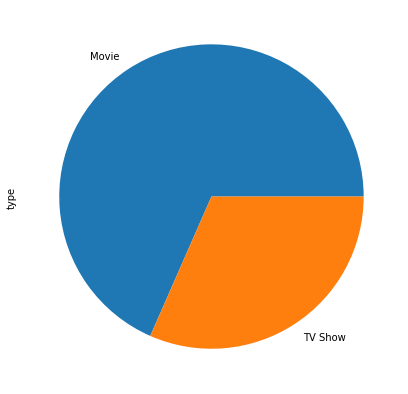

In [3]:
#1
df = pd.read_csv('netflix_titles.csv', usecols=['type'])
df = df['type'].value_counts()
df.plot(kind='pie', y='type')

Вывод: фильмов произведено больше, чем сериалов.

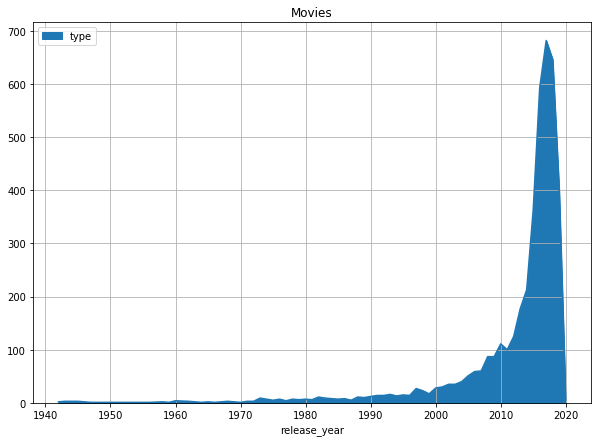

In [5]:
# 2
df = pd.read_csv('netflix_titles.csv')
df = df[['type', 'release_year']]
movies = df[df['type']=='Movie']
movies_v = movies.groupby('release_year').count()
movies_v.plot(kind='area', title='Movies', grid = True)

In [ ]:
Вывод: До 2010 года производилось меньше 100 фильмов в год

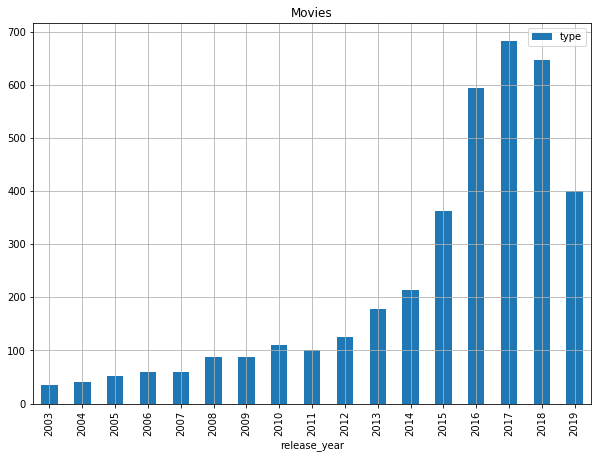

In [6]:
#3.1
df = pd.read_csv('netflix_titles.csv')
movies_v = df[df['type'] == 'Movie']
movies_v = movies_v[movies_v['release_year'].between(2003, 2019)]
movies_v = movies_v[['type', 'release_year']]
movies_v = movies_v.groupby('release_year').count()
#movies_v
movies_v.plot(kind = 'bar', title = 'Movies', grid = True)

Вывод: Резкий рост производства фильмов начался с 2014 года. Спад с 2019 г.

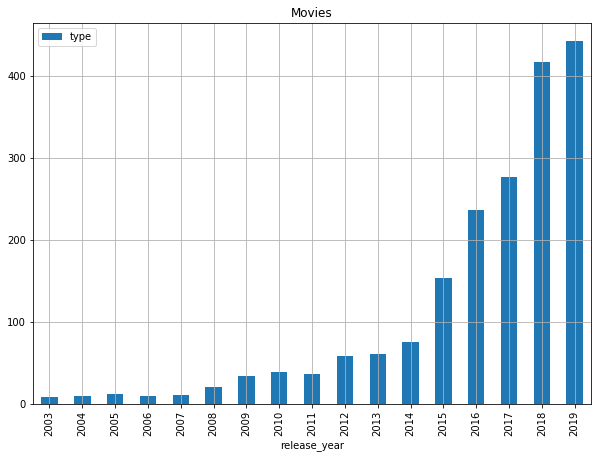

In [7]:
#3.2
df = pd.read_csv('netflix_titles.csv')
tv_show_v = df[df['type'] == 'TV Show']
tv_show_v = tv_show_v[tv_show_v['release_year'].between(2003, 2019)]
tv_show_v = tv_show_v[['type', 'release_year']]
tv_show_v = tv_show_v.groupby('release_year').count()
tv_show_v.plot(kind = 'bar', title = 'Movies', grid = True)

Вывод: до 2015 года выпускалось меньше 100 сериалов в год, после начался резкий рост. С 2013 года Netflix выпускает собственные фильмы. Сериалы набирают популярность.

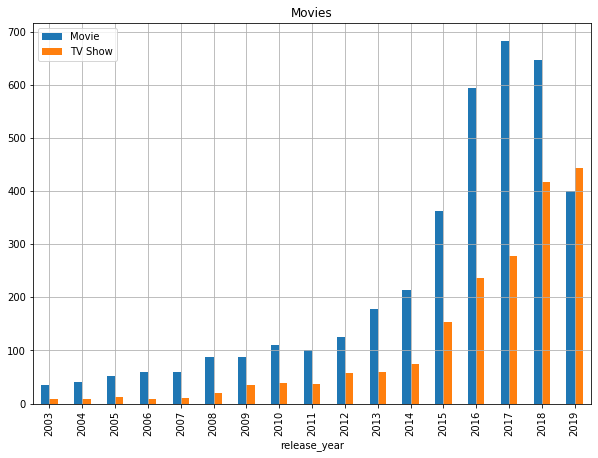

In [21]:
#4.1
df_all = movies_v.merge(tv_show_v, on='release_year', how='left')
df_all.columns.values[0] = 'Movie'
df_all.columns.values[1] = 'TV Show'
df_all
df_all.plot(kind = 'bar', title = 'Movies', grid = True)

Вывод: Доля сериалов начинает расти

In [267]:
#4.2
import seaborn as sns

In [23]:
df = pd.read_csv('netflix_titles.csv')
df = df.groupby(['type','release_year'])['show_id'].agg(['count']).reset_index()
df = df[df['release_year'].between(2003, 2019)]
#df

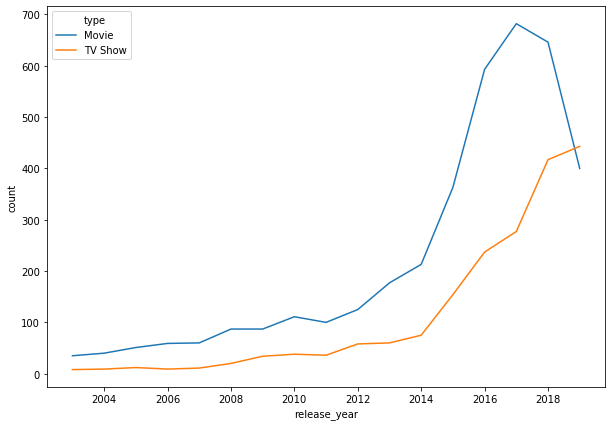

In [269]:
sns.lineplot(x='release_year', y='count', hue='type', data=df)

Вывод: в 2019 году сериалов стало выпускаться больше, чем фильмов. Фильмы теряют популярность с 2019 года.

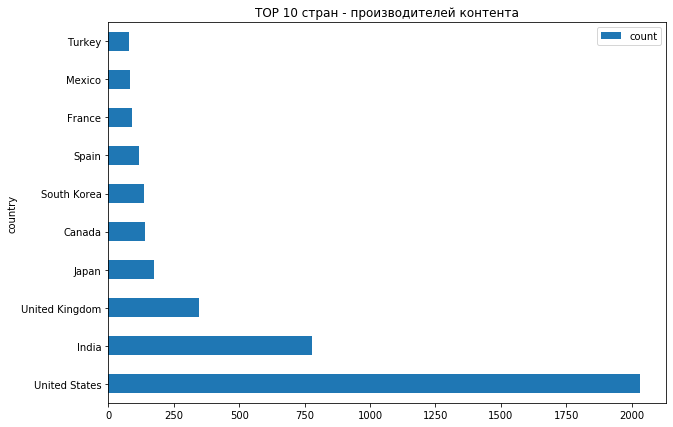

In [24]:
#5
df = pd.read_csv('netflix_titles.csv')
df1 = df.groupby('country')['show_id'].agg(['count']).sort_values(['count'], ascending = False).head(10)
df1.plot(kind='barh', title = 'TOP 10 стран - производителей контента')

ТОП 10 производителей контента

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000056F44C8>],
      dtype=object)

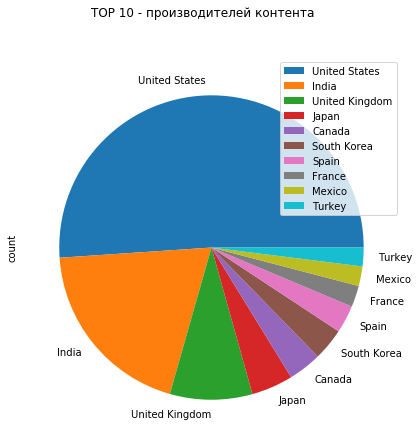

In [25]:
df1.plot(kind='pie', title = 'TOP 10 - производителей контента', subplots=True)